In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)


In [2]:
df=pd.read_csv('gas price.csv')
print(df.shape)
df

(19, 11)


,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


In [3]:
y=df['USA'].values
x=df['Year'].values
print(x,y)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008] [1.16 1.14 1.13 1.11 1.11 1.15 1.23 1.23 1.06 1.17 1.51 1.46 1.36 1.59
 1.88 2.3  2.59 2.8  3.27]


In [4]:
mean_x=np.mean(x)
mean_y=np.mean(y)
print(mean_x,mean_y)

1999.0 1.5921052631578947


In [5]:
m=len(x)
m

19

In [6]:
numer=0
demor=0
for i in range(m):
    numer +=(x[i]-mean_x)*(y[i]-mean_y)
    demor +=(x[i]-mean_x)**2
print(numer,demor)

56.540000000000006 570.0


In [7]:
b1=numer/demor
b1

0.09919298245614036

In [8]:
b0=mean_y-(b1*mean_x)
b0

-196.69466666666668

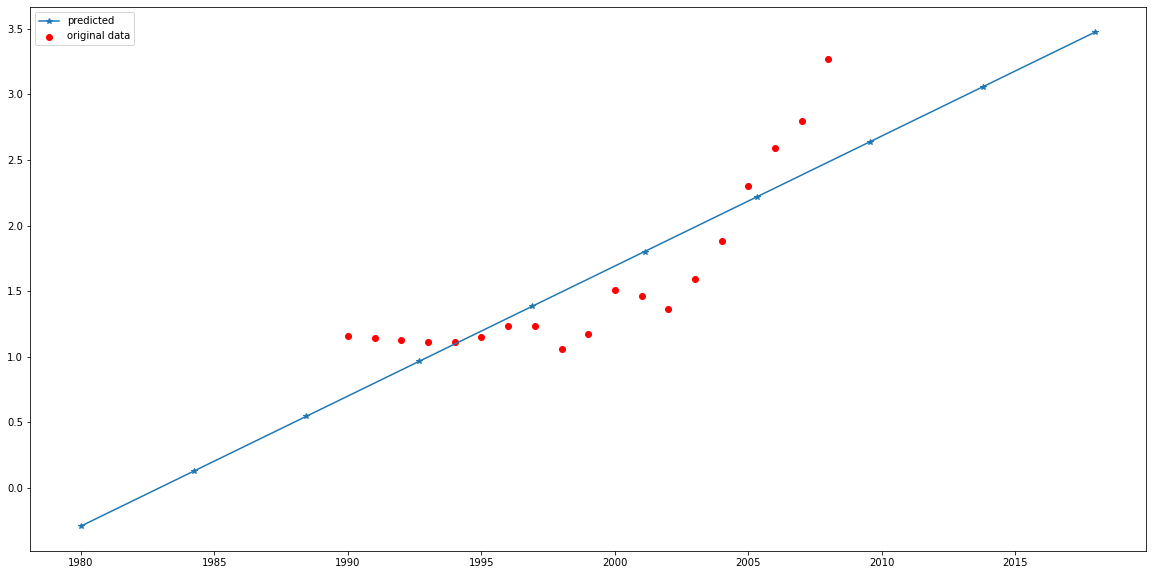

In [9]:
max_x=np.max(x)+10
min_x=np.min(x)-10
x=np.linspace(min_x,max_x,10)
y=b0+b1*x

plt.plot(x,y,'*-',label='predicted')
plt.scatter(df['Year'].values,df['USA'].values,label='original data',color='r')
#plt.xticks([1990 ,1991, 1992, 1993, 1994, 1995 ,1996, 1997 ,1998, 1999, 2000, 2001, 2002, 2003, 2004 ,2005 ,2006, 2007, 2008])
plt.legend()
plt.show()

In [10]:
#plt.scatter(x,y)
#plt.scatter(df['Year'].values,df['USA'].values)
#plt.show()

In [11]:
ss_t=0
ss_p=0
x=df['Year'].values
y=df['USA'].values

for i in range(m):
    y_pred= b0 + b1 * x[i]
    ss_t +=( mean_y-y[i])**2
    ss_p +=( y_pred-mean_y)**2
r2=ss_p/ss_t
r2

0.7080636873151592

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
x=x.reshape((m,1))

reg=LinearRegression()

reg=reg.fit(x,y)
#print(reg)
pred_y=reg.predict(x)
print(pred_y)

[0.69936842 0.7985614  0.89775439 0.99694737 1.09614035 1.19533333
 1.29452632 1.3937193  1.49291228 1.59210526 1.69129825 1.79049123
 1.88968421 1.98887719 2.08807018 2.18726316 2.28645614 2.38564912
 2.48484211]


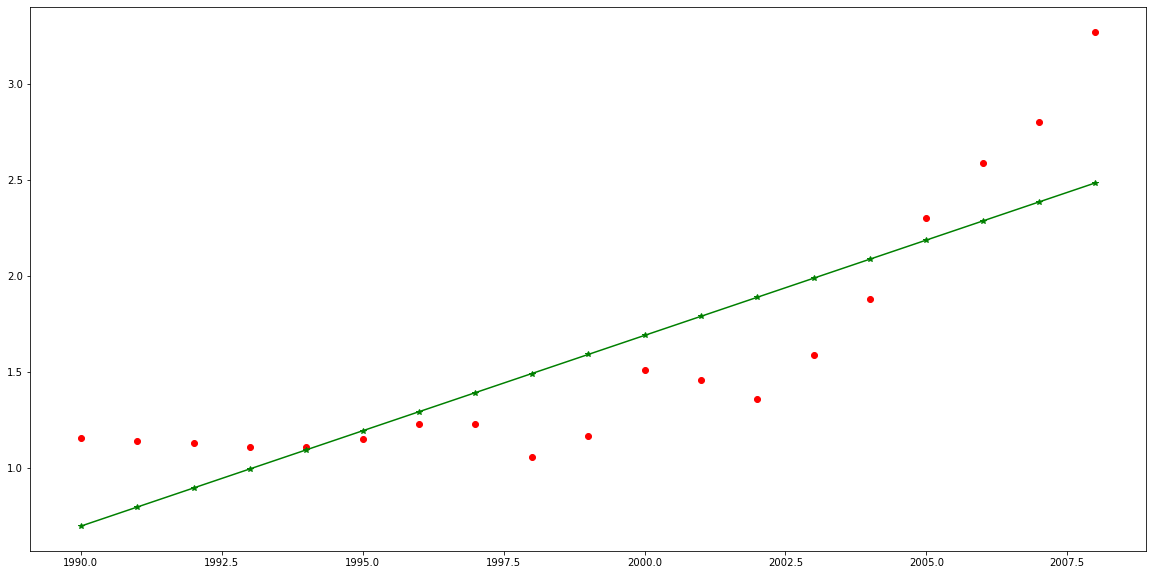

In [14]:
plt.plot(x,pred_y,'g*-')
plt.scatter(x,y,color='r')
plt.show()

In [15]:
r2_score=reg.score(x,y)
print(r2_score)


0.7080636873151638
